# Rock Vs Mine Prediction

Importing the libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection and Data processing

In [7]:
sonar_data = pd.read_csv(r"C:\Users\Sakshi\Downloads\sonar data.csv", header=None);

In [8]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
sonar_data.shape

(208, 61)

In [14]:
sonar_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

There is no null values present in the dataset.

In [10]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [11]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

### M ---> Mine
### R ---> Rock

<AxesSubplot:ylabel='count'>

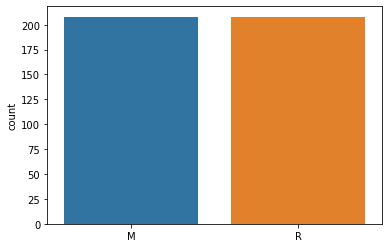

In [31]:
cat_var = pd.get_dummies(sonar_data[60])
sns.countplot(data = cat_var)

In [12]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [16]:
# Splitting the data into dependent and explanatory variable
X = sonar_data.iloc[:, :-1].values
y = sonar_data.iloc[:, -1].values

In [17]:
print(X)

[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]


In [18]:
print(y)

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']


Training and Test data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 1);

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


In [38]:
print(X_train)
print(y_train)

[[0.0414 0.0436 0.0447 ... 0.0077 0.0246 0.0198]
 [0.0123 0.0022 0.0196 ... 0.0058 0.0047 0.0071]
 [0.0152 0.0102 0.0113 ... 0.0011 0.0034 0.0033]
 ...
 [0.0117 0.0069 0.0279 ... 0.0062 0.0026 0.0052]
 [0.115  0.1163 0.0866 ... 0.0141 0.0068 0.0086]
 [0.0187 0.0346 0.0168 ... 0.0115 0.0193 0.0157]]
['M' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'M'
 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'M'
 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R'
 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'R'
 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M'
 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'M'
 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'R'
 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'R

Model Training

In [36]:
model = LogisticRegression()

In [39]:
# Training the logistic regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation

In [40]:
# Accuracy on the training data
X_train_prediction = model.predict(X_train);
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [41]:
print("Accuracy score on the training data : ", training_data_accuracy)

Accuracy score on the training data :  0.8342245989304813


In [44]:
# Accuracy on the test data
X_test_prediction = model.predict(X_test);
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [45]:
print("Accuracy score on the test data : ", test_data_accuracy)

Accuracy score on the test data :  0.7619047619047619


Making a Predictive System

In [52]:
input_data = (0.0162,0.0041,0.0239,0.0441,0.0630,0.0921,0.1368,0.1078,0.1552,0.1779,0.2164,0.2568,0.3089,0.3829,0.4393,0.5335,0.5996,0.6728,0.7309,0.8092,0.8941,0.9668,1.0000,0.9893,0.9376,0.8991,0.9184,0.9128,0.7811,0.6018,0.3765,0.3300,0.2280,0.0212,0.1117,0.1788,0.2373,0.2843,0.2241,0.2715,0.3363,0.2546,0.1867,0.2160,0.1278,0.0768,0.1070,0.0946,0.0636,0.0227,0.0128,0.0173,0.0135,0.0114,0.0062,0.0157,0.0088,0.0036,0.0053,0.0030);

# Changing the input data to a numpy array
input_data_as_np_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1, -1)


prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == "M"):
    print("The object is a Mine.")
    
else:
    print("The object is a Rock.")

['M']
The object is a Mine.
